<a href="https://colab.research.google.com/github/MadeAsthito/Data-Base-Comparison/blob/main/classifier/gradient_boosting/xgboost_implementation_1_many_category.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Data Preparation

## Loading Data

In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv('./train.csv')
df = pd.DataFrame(df)

df = df.iloc[:-1, :]

df

,id,age,diet,drinks,drugs,education,ethnicity,height,income,job,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status,fit_body
0,33904,29,NaN,socially,never,graduated from law school,"asian, hispanic / latin, white",69.0,-1,law / legal services,NaN,straight,likes dogs,catholicism,m,aquarius but it doesn&rsquo;t matter,no,"english (fluently), spanish (okay), korean (po...",single,yes
1,35538,19,NaN,NaN,NaN,NaN,other,69.0,-1,NaN,NaN,bisexual,has cats,buddhism,f,taurus,NaN,english,single,no
2,36731,32,mostly anything,socially,NaN,dropped out of college/university,white,69.0,100000,executive / management,NaN,straight,likes dogs and likes cats,christianity but not too serious about it,m,virgo but it doesn&rsquo;t matter,no,english (fluently),single,no
3,16304,36,strictly anything,socially,NaN,graduated from college/university,white,67.0,100000,computer / hardware / software,doesn&rsquo;t have kids,straight,likes dogs,atheism but not too serious about it,m,cancer but it doesn&rsquo;t matter,no,"english (okay), english (fluently), english (p...",single,no
4,19727,22,NaN,socially,never,graduated from college/university,asian,68.0,-1,computer / hardware / software,NaN,straight,NaN,NaN,m,NaN,no,"english, chinese",single,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40833,43241,30,mostly anything,rarely,never,dropped out of two-year college,white,72.0,20000,construction / craftsmanship,NaN,straight,likes dogs and has cats,atheism,m,taurus and it&rsquo;s fun to think about,no,"english (fluently), german (poorly)",seeing someone,no
40834,43498,24,anything,socially,never,graduated from college/university,white,70.0,-1,artistic / musical / writer,doesn&rsquo;t want kids,straight,likes dogs and likes cats,atheism but not too serious about it,f,sagittarius but it doesn&rsquo;t matter,no,"english (fluently), french (okay), spanish (po...",single,yes
40835,5149,30,strictly anything,socially,never,graduated from college/university,asian,69.0,-1,banking / financial / real estate,doesn&rsquo;t have kids,straight,likes dogs,agnosticism,m,sagittarius but it doesn&rsquo;t matter,no,"english (fluently), chinese (okay)",single,yes
40836,2085,34,anything,socially,NaN,graduated from ph.d program,NaN,62.0,-1,science / tech / engineering,"doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,NaN,m,leo but it doesn&rsquo;t matter,NaN,"english, spanish",single,yes


## Handle Missing Data

In [ ]:
df.fillna(value={'diet': 'anything', 'drinks': 'socially', 'drugs': 'never', 'education': 'unknown', 'ethnicity': 'other'}, inplace=True)

X = df.drop('fit_body', axis=1)
y = df['fit_body']

In [ ]:
y

In [ ]:
map_missing_data = {'diet': 'anything',
                    'drinks': 'socially',
                    'drugs': 'never',
                    'education': 'unknown',
                    'ethnicity': 'other',
                    'job': 'rather not say',
                    'offspring': 'unknown',
                    'orientation': 'straight',
                    'pets': 'unknown',
                    'religion': 'atheism',
                    'sign': 'but it doesn’t matter',
                    'smokes': 'never',
                    'speaks': 'unknown',
                    'status': 'single',
                    'sex': 'unknown'}

In [ ]:
def fill_missing_data(df):
    df_filled = df.copy()
    for col in df_filled.columns:
        if df_filled[col].dtype == 'O':  # Check if column is of object (string) type
            df_filled[col] = df_filled[col].fillna(map_missing_data.get(col, 'unknown'))
        else:
            df_filled[col] = df_filled[col].fillna(df_filled[col].mean())
    return df_filled

In [ ]:
from sklearn.preprocessing import FunctionTransformer

fill_na_imputer = FunctionTransformer(func=fill_missing_data, validate=False)

## Data Preprocessing

In [ ]:
from sklearn.preprocessing import LabelBinarizer

binary_encoder = LabelBinarizer()

y_binary = binary_encoder.fit_transform(y)

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

categorical_col = ['diet',	'drinks',	'drugs',	'education',	'ethnicity',	'job',	'offspring',	'orientation',	'pets',	'religion', 'sex', 'sign',	'smokes',	'speaks',	'status']

preprocessor = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'), categorical_col),
    remainder='passthrough'
)

In [ ]:
preprocessor.fit_transform(X)

<40838x6103 sparse matrix of type '<class 'numpy.float64'>'
	with 775921 stored elements in Compressed Sparse Row format>

## Split Dataset and Preprocess Dataset

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_test

,id,age,diet,drinks,drugs,education,ethnicity,height,income,job,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
13618,15107,38,anything,socially,never,graduated from masters program,other,71.0,-1,other,NaN,straight,NaN,judaism,m,sagittarius,no,"english, farsi",single
7745,39334,32,anything,socially,never,graduated from college/university,"asian, hispanic / latin",66.0,-1,education / academia,NaN,straight,likes dogs,christianity,f,capricorn and it&rsquo;s fun to think about,no,"english (fluently), spanish (okay), japanese (...",seeing someone
879,17672,35,mostly anything,socially,never,college/university,white,77.0,80000,computer / hardware / software,doesn&rsquo;t have kids,straight,NaN,agnosticism and somewhat serious about it,m,libra,NaN,english,single
14983,7560,23,mostly anything,socially,never,graduated from college/university,white,72.0,60000,artistic / musical / writer,doesn&rsquo;t have kids,straight,likes dogs and likes cats,other and somewhat serious about it,m,sagittarius but it doesn&rsquo;t matter,no,"english (fluently), czech (poorly)",single
21865,1434,36,anything,socially,never,working on ph.d program,white,72.0,-1,NaN,"doesn&rsquo;t have kids, but wants them",straight,likes dogs and likes cats,NaN,m,sagittarius and it&rsquo;s fun to think about,no,"english, spanish (okay)",single
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13542,21898,30,mostly other,not at all,never,graduated from college/university,white,74.0,-1,artistic / musical / writer,NaN,gay,likes dogs,other and laughing about it,m,scorpio and it matters a lot,no,english,available
4844,40829,31,anything,socially,never,graduated from college/university,white,68.0,-1,executive / management,NaN,gay,has dogs,NaN,m,virgo but it doesn&rsquo;t matter,no,"english, portuguese (okay)",single
14171,43516,38,anything,socially,never,graduated from college/university,white,63.0,-1,clerical / administrative,doesn&rsquo;t have kids,straight,likes dogs and likes cats,christianity and very serious about it,f,NaN,no,"english, french (poorly), turkish (poorly)",single
18294,13478,26,anything,socially,never,graduated from masters program,white,71.0,-1,science / tech / engineering,NaN,straight,likes dogs and likes cats,NaN,m,NaN,no,english,single


In [ ]:
y_train = binary_encoder.fit_transform(y_train)
y_test = binary_encoder.fit_transform(y_test)

In [ ]:
y_train

array([[0],
       [1],
       [0],
       ...,
       [0],
       [0],
       [1]])

In [ ]:
y_train

array([[0],
       [1],
       [0],
       ...,
       [0],
       [0],
       [1]])

# Classifier

In [ ]:
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier

classifier = XGBClassifier()

# Model Experiment

## Model Pipeline #1 XGBClassifier

### Creating Pipeline

In [ ]:
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(
    fill_na_imputer,
    preprocessor,
    classifier
)

### CV Accuracy Mean

In [ ]:
from sklearn.model_selection import cross_val_score

cross_val_score(pipe, X, y_binary, cv=5, scoring='accuracy').mean()

0.5958419115076595

### Pipeline Fitting

In [ ]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('functiontransformer',
                 FunctionTransformer(func=<function fill_missing_data at 0x7aaa5845b640>)),
                ('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['diet', 'drinks', 'drugs',
                                                   'education', 'ethnicity',
                                                   'job', 'offspring',
                                                   'orientation', 'pets',
                                                   'religion', 'sex', 's...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

### Pipeline Prediction

In [ ]:
y_pred = pipe.predict(X_test)

### Pipeline Accuracy

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.6f}")

Accuracy: 0.593046


In [ ]:
df_pred = X_test[['id']].copy()
df_pred['fit_body'] = y_pred
df_pred['fit_body'] = df_pred['fit_body'].apply(lambda x: 'yes' if x > 0 else 'no')

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
# @title distribution of fit_body

category_counts = df_pred['fit_body'].value_counts()
category_counts

fit_body
yes    5017
no     3151
Name: count, dtype: int64

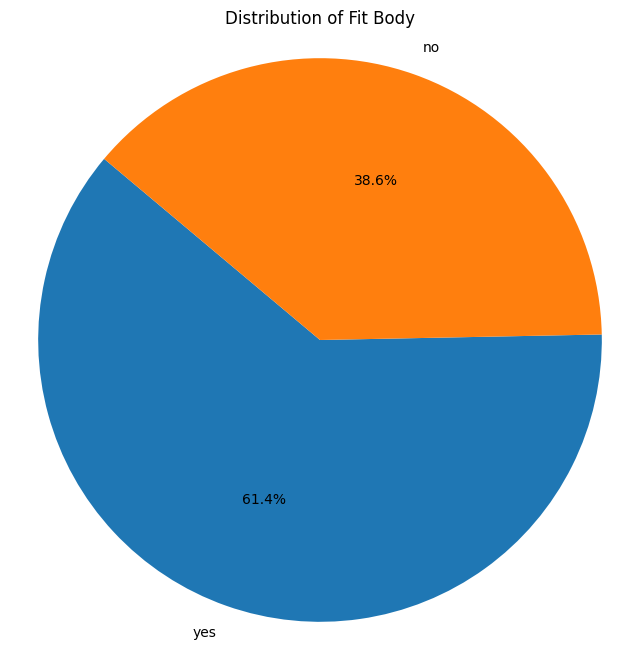

In [ ]:
# @title distribution of fit_body

plt.figure(figsize=(8, 8))  # Set the figure size
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Fit Body')  # Set the title of the pie chart
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

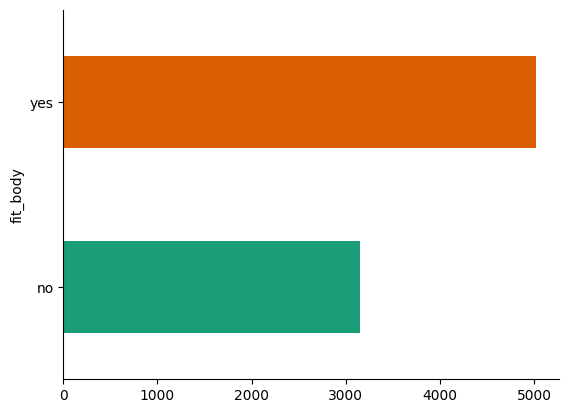

In [ ]:
# @title fit_body
df_pred.groupby('fit_body').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

## XGBClassifier Hypertuning using Random Search

### Initialize Tuning Parameter

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

# Define the parameter grid for XGBoost
param_grid = {
    'xgbclassifier__n_estimators': [100, 200, 300],
    'xgbclassifier__max_depth': [5, 7, 9, 11, 13],  # Expanded range for high-dimensional data
    'xgbclassifier__learning_rate': [0.01, 0.1, 0.2],
    'xgbclassifier__subsample': [0.7, 0.8, 0.9],
    'xgbclassifier__colsample_bytree': [0.7, 0.8, 0.9],
    'xgbclassifier__reg_alpha': [0, 0.1, 0.5],
    'xgbclassifier__reg_lambda': [0, 0.1, 1],
    'xgbclassifier__min_child_weight': [1, 3, 5, 7, 10, 15, 20],  # Expanded range for high-dimensional data
    'xgbclassifier__gamma': [0.0, 0.1, 0.2, 0.3, 0.4]
}


### Create Random Search with 10 iteration

In [ ]:
# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator=pipe,
    param_distributions=param_grid,
    n_iter=25,
    scoring='accuracy',
    cv=10,
    verbose=1,
    n_jobs=-1
)

### Random Search Fit

In [ ]:
# Fit the RandomizedSearchCV object on your training data
random_search.fit(X_train, y_train)

Fitting 10 folds for each of 25 candidates, totalling 250 fits


RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('functiontransformer',
                                              FunctionTransformer(func=<function fill_missing_data at 0x7aaa5845b640>)),
                                             ('columntransformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('onehotencoder',
                                                                               OneHotEncoder(handle_unknown='ignore'),
                                                                               ['diet',
                                                                                'drinks',
                                                                                'drugs',
                                                                                'education',
                                                                                'ethnicity',
                                                                                'job',
                                                                                'offspring',
                                                                                'orie...
                                        'xgbclassifier__gamma': [0.0, 0.1, 0.2,
                                                                 0.3, 0.4],
                                        'xgbclassifier__learning_rate': [0.01,
                                                                         0.1,
                                                                         0.2],
                                        'xgbclassifier__max_depth': [5, 7, 9,
                                                                     11, 13],
                                        'xgbclassifier__min_child_weight': [1,
                                                                            3,
                                                                            5,
                                                                            7,
                                                                            10,
                                                                            15,
                                                                            20],
                                        'xgbclassifier__n_estimators': [100,
                                                                        200,
                                                                        300],
                                        'xgbclassifier__reg_alpha': [0, 0.1,
                                                                     0.5],
                                        'xgbclassifier__reg_lambda': [0, 0.1,
                                                                      1],
                                        'xgbclassifier__subsample': [0.7, 0.8,
                                                                     0.9]},
                   scoring='accuracy', verbose=1)

### Result of Random Search

In [ ]:
# Print the best parameters and best score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

# Evaluate the best model on the test set
best_model = random_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)

Best Parameters: {'xgbclassifier__subsample': 0.7, 'xgbclassifier__reg_lambda': 0, 'xgbclassifier__reg_alpha': 0.1, 'xgbclassifier__n_estimators': 200, 'xgbclassifier__min_child_weight': 20, 'xgbclassifier__max_depth': 5, 'xgbclassifier__learning_rate': 0.1, 'xgbclassifier__gamma': 0.0, 'xgbclassifier__colsample_bytree': 0.7}
Best Score: 0.6042546678910314
Test Accuracy: 0.6059010773751224


Best Parameters: {'xgbclassifier__subsample': 0.9, 'xgbclassifier__reg_lambda': 0.1, 'xgbclassifier__reg_alpha': 0.5, 'xgbclassifier__n_estimators': 200, 'xgbclassifier__max_depth': 3, 'xgbclassifier__learning_rate': 0.2, 'xgbclassifier__colsample_bytree': 0.9}
Best Score: 0.6017265324408678
Test Accuracy: 0.6003917727717923

Best Parameters: {'xgbclassifier__subsample': 0.7, 'xgbclassifier__reg_lambda': 1, 'xgbclassifier__reg_alpha': 0.1, 'xgbclassifier__n_estimators': 200, 'xgbclassifier__min_child_weight': 5, 'xgbclassifier__max_depth': 5, 'xgbclassifier__learning_rate': 0.1, 'xgbclassifier__gamma': 0.2, 'xgbclassifier__colsample_bytree': 0.9}
Best Score: 0.602308026123843
Test Accuracy: 0.6034524975514202

Best Parameters: {'xgbclassifier__subsample': 0.8, 'xgbclassifier__reg_lambda': 1, 'xgbclassifier__reg_alpha': 0.5, 'xgbclassifier__n_estimators': 200, 'xgbclassifier__min_child_weight': 5, 'xgbclassifier__max_depth': 3, 'xgbclassifier__learning_rate': 0.2, 'xgbclassifier__gamma': 0.0, 'xgbclassifier__colsample_bytree': 0.9}
Best Score: 0.6029996939087849
Test Accuracy: 0.6047992164544564

In [ ]:
df_test = pd.read_csv('test.csv')
df_test

,id,age,diet,drinks,drugs,education,ethnicity,height,income,job,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,30968,25,mostly anything,socially,never,graduated from college/university,"asian, white",73.0,-1,computer / hardware / software,NaN,straight,NaN,agnosticism but not too serious about it,m,aquarius and it&rsquo;s fun to think about,no,english,single
1,36173,22,NaN,often,NaN,working on college/university,"asian, pacific islander",64.0,-1,student,NaN,straight,has cats,other but not too serious about it,f,libra and it&rsquo;s fun to think about,sometimes,"english (fluently), tagalog (okay), french (po...",single
2,32466,44,mostly anything,socially,never,graduated from college/university,white,73.0,-1,artistic / musical / writer,"doesn&rsquo;t have kids, but might want them",gay,has dogs,NaN,m,virgo but it doesn&rsquo;t matter,no,"english (fluently), italian (okay)",single
3,27038,28,NaN,socially,never,graduated from masters program,white,71.0,-1,NaN,NaN,straight,NaN,NaN,f,libra but it doesn&rsquo;t matter,no,"english (fluently), german (fluently), czech (...",single
4,17610,26,strictly anything,socially,sometimes,graduated from masters program,NaN,74.0,-1,education / academia,doesn&rsquo;t want kids,straight,likes dogs,atheism and somewhat serious about it,m,scorpio but it doesn&rsquo;t matter,NaN,"english (fluently), french, japanese, spanish,...",single
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13608,20510,28,NaN,socially,NaN,dropped out of college/university,white,66.0,80000,law / legal services,doesn&rsquo;t have kids,straight,likes dogs and has cats,agnosticism,f,virgo,no,english,single
13609,54432,32,NaN,socially,never,graduated from masters program,NaN,63.0,-1,entertainment / media,NaN,straight,has dogs,agnosticism,f,NaN,NaN,english,single
13610,49664,25,mostly vegetarian,NaN,sometimes,NaN,white,70.0,-1,NaN,NaN,straight,has dogs,NaN,m,NaN,NaN,english,single
13611,43797,45,strictly anything,socially,never,graduated from college/university,white,62.0,80000,other,has kids,straight,NaN,NaN,f,pisces and it&rsquo;s fun to think about,no,english,single


In [ ]:
y_pred = random_search.predict(df_test)

In [ ]:
df_pred = df_test[['id']].copy()
df_pred['fit_body'] = y_pred
df_pred['fit_body'] = df_pred['fit_body'].apply(lambda x: 'yes' if x > 0 else 'no')

In [ ]:
df_pred

,id,fit_body
0,30968,yes
1,36173,no
2,32466,yes
3,27038,yes
4,17610,yes
...,...,...
13608,20510,no
13609,54432,no
13610,49664,yes
13611,43797,yes


## Model Pipeline #2 XGBClassifier with RandomSearch

### Creating Pipeline

In [ ]:
best_params_prefix = random_search.best_params_

# Initialize an empty dictionary for storing cleaned parameters
best_params = {}

# Iterate over the parameters and remove the 'xgbclassifier__' prefix
for key, value in best_params_prefix.items():
    clean_key = key.replace('xgbclassifier__', '')
    best_params[clean_key] = value


best_classifier = XGBClassifier(**best_params)

best_pipe = make_pipeline(
    fill_na_imputer,
    preprocessor,
    best_classifier
)

In [ ]:
best_classifier

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=20, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

### Pipeline Fitting

In [ ]:
best_pipe.fit(X_train, y_train)

Pipeline(steps=[('functiontransformer',
                 FunctionTransformer(func=<function fill_missing_data at 0x7aaa5845b640>)),
                ('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['diet', 'drinks', 'drugs',
                                                   'education', 'ethnicity',
                                                   'job', 'offspring',
                                                   'orientation', 'pets',
                                                   'religion', 'sex', 's...
                               feature_types=None, gamma=0.0, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=5, max_leaves=None,
                               min_child_weight=20, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=200, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

### Pipeline Prediction

In [ ]:
y_pred = best_pipe.predict(X_test)

### Pipeline Accuracy

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.5f}")

Accuracy: 0.60590


In [ ]:
df_test = pd.read_csv('test.csv')
y_pred = best_pipe.predict(df_test)

In [ ]:
df_pred = df_test[['id']].copy()
df_pred['fit_body'] = y_pred
df_pred['fit_body'] = df_pred['fit_body'].apply(lambda x: 'yes' if x > 0 else 'no')

In [ ]:
df_pred.to_csv('submission_no2.csv', index=False)

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
# @title distribution of fit_body

category_counts = df_pred['fit_body'].value_counts()
category_counts

fit_body
yes    8314
no     5299
Name: count, dtype: int64

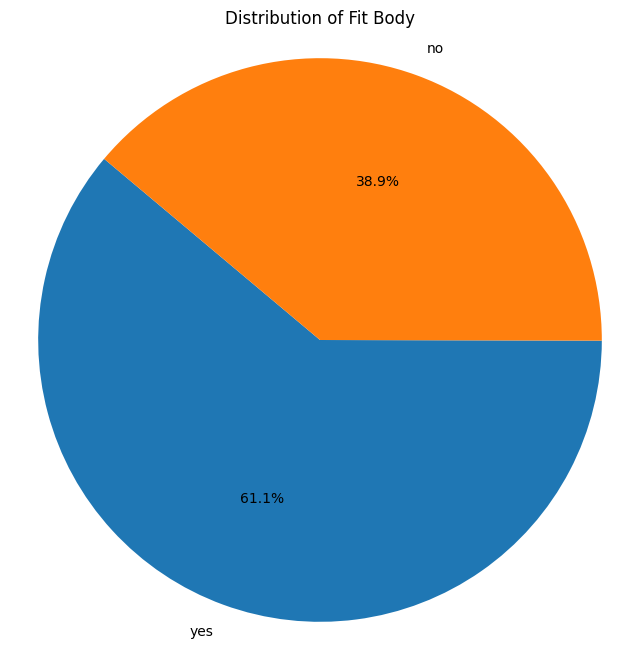

In [ ]:
# @title distribution of fit_body

plt.figure(figsize=(8, 8))  # Set the figure size
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Fit Body')  # Set the title of the pie chart
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

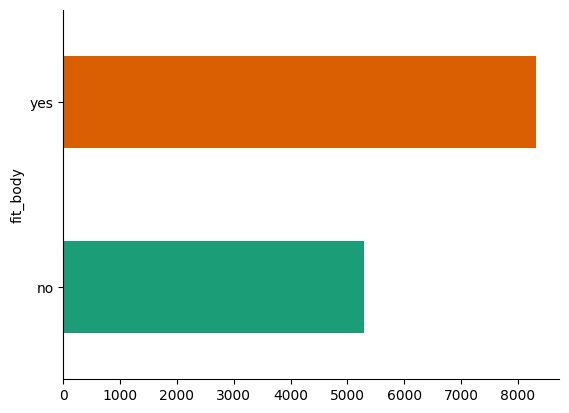

In [ ]:
# @title fit_body
df_pred.groupby('fit_body').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

## Model Pipeline #3 XGBClassifier with SelectFromModel

### SelectFromModel Feature Selection

In [ ]:
from sklearn.feature_selection import SelectFromModel

# Get feature importances
importances = pipe.named_steps['xgbclassifier'].feature_importances_

In [ ]:
# Determine threshold for feature selection (e.g., top 10% important features)
threshold = np.percentile(importances, 50)

# Create a feature selector based on XGBoost feature importances
selector = SelectFromModel(pipe.named_steps['xgbclassifier'], threshold=threshold)

### Creating Pipeline

In [ ]:
from sklearn.decomposition import TruncatedSVD
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# Update pipeline with feature selector
final_pipe = make_pipeline(
    preprocessor,
    selector,
    XGBClassifier(random_state=42)  # XGBoost classifier
)

### Pipeline Fitting

In [ ]:
final_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['diet', 'drinks', 'drugs',
                                                   'education', 'ethnicity',
                                                   'job', 'offspring',
                                                   'orientation', 'pets',
                                                   'religion', 'sex', 'sign',
                                                   'smokes', 'speaks',
                                                   'status'])])),
                ('selectfrommodel',
                 SelectFromModel(estimator=XGBClassifie...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

### Pipeline Evaluation

In [ ]:
# Evaluate final pipeline using cross-validation
cv_scores = cross_val_score(final_pipe, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

### Pipeline Prediction

In [ ]:
y_pred = final_pipe.predict(X_test)

### Pipeline Accuracy

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.6f}")

Accuracy: 0.589128


In [ ]:
df_test = pd.read_csv('test.csv')
df_test

,id,age,diet,drinks,drugs,education,ethnicity,height,income,job,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,30968,25,mostly anything,socially,never,graduated from college/university,"asian, white",73.0,-1,computer / hardware / software,NaN,straight,NaN,agnosticism but not too serious about it,m,aquarius and it&rsquo;s fun to think about,no,english,single
1,36173,22,NaN,often,NaN,working on college/university,"asian, pacific islander",64.0,-1,student,NaN,straight,has cats,other but not too serious about it,f,libra and it&rsquo;s fun to think about,sometimes,"english (fluently), tagalog (okay), french (po...",single
2,32466,44,mostly anything,socially,never,graduated from college/university,white,73.0,-1,artistic / musical / writer,"doesn&rsquo;t have kids, but might want them",gay,has dogs,NaN,m,virgo but it doesn&rsquo;t matter,no,"english (fluently), italian (okay)",single
3,27038,28,NaN,socially,never,graduated from masters program,white,71.0,-1,NaN,NaN,straight,NaN,NaN,f,libra but it doesn&rsquo;t matter,no,"english (fluently), german (fluently), czech (...",single
4,17610,26,strictly anything,socially,sometimes,graduated from masters program,NaN,74.0,-1,education / academia,doesn&rsquo;t want kids,straight,likes dogs,atheism and somewhat serious about it,m,scorpio but it doesn&rsquo;t matter,NaN,"english (fluently), french, japanese, spanish,...",single
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13608,20510,28,NaN,socially,NaN,dropped out of college/university,white,66.0,80000,law / legal services,doesn&rsquo;t have kids,straight,likes dogs and has cats,agnosticism,f,virgo,no,english,single
13609,54432,32,NaN,socially,never,graduated from masters program,NaN,63.0,-1,entertainment / media,NaN,straight,has dogs,agnosticism,f,NaN,NaN,english,single
13610,49664,25,mostly vegetarian,NaN,sometimes,NaN,white,70.0,-1,NaN,NaN,straight,has dogs,NaN,m,NaN,NaN,english,single
13611,43797,45,strictly anything,socially,never,graduated from college/university,white,62.0,80000,other,has kids,straight,NaN,NaN,f,pisces and it&rsquo;s fun to think about,no,english,single


In [ ]:
y_pred = final_pipe.predict(df_test)

In [ ]:
df_pred = df_test[['id']].copy()
df_pred['fit_body'] = y_pred
df_pred['fit_body'] = df_pred['fit_body'].apply(lambda x: 'yes' if x > 0 else 'no')

In [ ]:
df_pred

In [ ]:
df_pred.to_csv('submission.csv', index=False)

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
# @title distribution of fit_body

category_counts = df_pred['fit_body'].value_counts()
category_counts

In [ ]:
# @title distribution of fit_body

plt.figure(figsize=(8, 8))  # Set the figure size
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Fit Body')  # Set the title of the pie chart
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

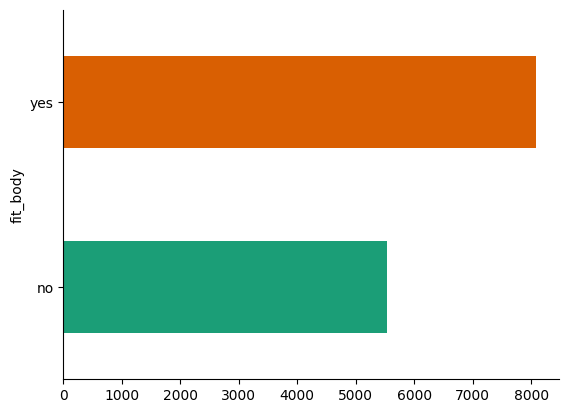

In [ ]:
# @title fit_body
df_pred.groupby('fit_body').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

# Experiment

## Manual Feature Selection

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('train.csv')

df.columns

In [ ]:
# @title Data Cleansing

# ('job', 0.13698978069819698),
# ('education', 0.13558325438513258),
# ('pets', 0.11958948551225469),
# ('offspring', 0.11187010700403384),
# ('religion', 0.10917217461161849),
# ('speaks', 0.103089373151931),
# ('smokes', 0.10298355401870131),

undesired_col = ['id', 'education', 'income', 'job', 'orientation', 'pets', 'religion', 'sign', 'speaks']

df_cleaned = df[['job', 'education', 'pets', 'offspring', 'religion', 'speaks', 'smokes', 'fit_body']]

df_cleaned

In [ ]:
df_cleaned.isnull().sum()

In [ ]:
# replace_missing_data = {
#     'diet': 'anything',
#     'drinks': 'socially',
#     'drugs': 'never',
#     'ethnicity': 'other',
#     'offspring': 'doesnt have a kid',
#     'smokes': 'no'
# }

# df_cleaned.fillna(value=replace_missing_data, inplace=True)

for col in df_cleaned.columns:
    if df_cleaned[col].dtype == 'object' or pd.api.types.is_categorical_dtype(df_cleaned[col]):
        # Fill missing values with the mode of the column
        df_cleaned[col].fillna(df_cleaned[col].mode()[0], inplace=True)

df_cleaned = df_cleaned.iloc[:-1, :]

df_cleaned.info()
df_cleaned.isnull().sum()

In [ ]:
df_cleaned

In [ ]:
from scipy.stats import chi2_contingency

def cramers_v(confusion_matrix):
    chi2, _, _, _ = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    cramers_v_value = np.sqrt(phi2 / (min(r, k) - 1))
    return cramers_v_value

In [ ]:
target_variable = 'fit_body'
categorical_variables = [col for col in df_cleaned.columns if col != target_variable]

In [ ]:
results = {}

for cat_var in categorical_variables:
    contingency_table = pd.crosstab(df_cleaned[cat_var], df_cleaned[target_variable])

    v = cramers_v(contingency_table)

    results[cat_var] = v

sorted_results = sorted(results.items(), key=lambda x: x[1], reverse=True)

for var, v in sorted_results:
    print(f"Cramér's V for {var}: {v:.4f}")

threshold = 0.1
selected_features = [var for var, v in sorted_results if v >= threshold]
selected_features

In [ ]:
from xgboost import XGBClassifier

classifier = XGBClassifier()

X = df_cleaned.drop(columns=['fit_body'])
# X = df_cleaned[selected_features]
y = df_cleaned['fit_body']

X

In [ ]:
from sklearn.preprocessing import LabelBinarizer

binary_encoder = LabelBinarizer()

y_binary = binary_encoder.fit_transform(y)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False, drop='first')  # 'sparse=False' to return a dense array, 'drop='first'' to drop the first category in each feature

df_select = X.drop(columns=['age', 'height'])
# df_select = X.drop(columns=['age'])

encoded_features = encoder.fit_transform(df_select)

encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(df_select.columns))

encoded_df

X_transformed = pd.concat([encoded_df, X.drop(df_select.columns, axis=1)], axis=1)

X_transformed

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_transformed, y_binary, test_size=0.3, random_state=42)

In [ ]:
classifier.fit(X_train, y_train)

In [ ]:
y_pred = classifier.predict(X_test)

### Pipeline Accuracy

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.5f}")

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Sample DataFrame with categorical features and target variable
df = pd.read_csv('train.csv')

# Define a function to calculate Cramér's V for categorical variables
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Calculate Cramér's V for each categorical feature with respect to the target
target = df['fit_body']
categorical_features = df.drop('fit_body', axis=1).columns

feature_scores = {}
for feature in categorical_features:
    score = cramers_v(df[feature], target)
    feature_scores[feature] = score

# Sort features by Cramér's V score in descending order
sorted_features = sorted(feature_scores.items(), key=lambda x: x[1], reverse=True)

sorted_features

referensi :
1. How to handle Categorical Data : https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/
2. Chi-squared-test Analysis for Feature Selection : https://machinelearningmastery.com/chi-squared-test-for-machine-learning/

## Dimensionality Reduction using Clustering

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans

# Sample DataFrame with categorical variable (e.g., languages)
data = {
    'user_id': [1, 2, 3],
    'languages': ['english (fluently), chinese (okay)', 'spanish (okay)', 'english (fluently), french (okay)'],
    'age': [25, 30, 28]
}

df = pd.DataFrame(data)

# Extract unique languages from the DataFrame
unique_languages = df['languages'].str.split(', ').explode().str.split(' ').str[0].unique()

unique_languages


In [ ]:
# Cluster the unique languages into groups (e.g., 3 clusters)
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

kmeans

In [ ]:
# Convert languages to numeric features using one-hot encoding
language_features = pd.get_dummies(df['languages'].str.split(', ').explode(), prefix='language')
language_features

In [ ]:
# Fit K-means clustering on the language features
clusters = kmeans.fit_predict(language_features)
clusters

In [ ]:
# Create a mapping dictionary for language to cluster label
language_cluster_map = dict(zip(language_features.index, clusters))
language_cluster_map

In [ ]:
df['language_cluster'] = df.index.map(language_cluster_map)
df

In [ ]:
df.drop('languages', axis=1, inplace=True)

df

## 60%???

In [ ]:
import pandas as pd
import numpy as np